**PREDICTING THE ADHD**

**LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.metrics import mutual_info_score
import warnings
warnings.filterwarnings('ignore')

**DATA PROCESSING**

**CONVERTING 121 FILES TO MUTUAL INFORMATION MATRIX AND FINDING MEAN FOR EACH COLUMN**

In [3]:
def calc_MI(x,y,bins):
  c_xy = np.histogram2d(x,y,bins)[0]
  mi = mutual_info_score(None,None,contingency=c_xy)
  return mi

In [4]:
final_data = []

def collect_rows(directory, filename, isPresent):
  data = pd.read_csv(f'/content/drive/MyDrive/datathon/{directory}/{filename}')
  data = np.array(data)
  n = data.shape[1]
  matMI = np.zeros([19,19],dtype='float64')
  for ix in range(n):
    for jx in range(n):
      matMI[ix][jx] = calc_MI(data[:,ix],data[:,jx],19)
  row = []
  for i in range(19):
    row.append(np.mean(matMI[:,i]))
  row.append(isPresent)
  return row

for directory in os.listdir('/content/drive/MyDrive/datathon'):
  for filename in os.listdir(f"/content/drive/MyDrive/datathon/{directory}"):
    if('adhd' in directory):
      final_data.append(collect_rows(directory,filename,1.0))
    else:
      final_data.append(collect_rows(directory,filename,0.0))

print(final_data)

[[0.13100661688098925, 0.15116608953815458, 0.196283677376797, 0.19621530368023044, 0.2037124729811943, 0.19515716889121995, 0.2041256606867888, 0.22048551763248878, 0.16839293031644265, 0.21181026312184573, 0.10760071244879467, 0.09572050219165995, 0.15368301013027083, 0.19058926186647804, 0.12015360192011122, 0.18166346566898506, 0.12414890558648624, 0.19444282967700782, 0.1866054953597992, 1.0], [0.23841089433386695, 0.14633138148715322, 0.28110579236261757, 0.20539273594722343, 0.28250490640452913, 0.23590621513698706, 0.2648756824309639, 0.2361345662404933, 0.25149368379198156, 0.2194613449145117, 0.21585709283230567, 0.1713795253194883, 0.14599047782000865, 0.14874419960566718, 0.20635155706298447, 0.18492432510994997, 0.2665755036467246, 0.23506605642152734, 0.25124444584075406, 1.0], [0.2234728398120931, 0.18909851098128896, 0.2568034464937632, 0.2628258308545765, 0.23338726632256793, 0.23583154002966547, 0.2122764768629919, 0.22825050259396965, 0.18852494097985475, 0.186579521

**CONVERTING LIST TO DATAFRAME**

In [5]:
data=pd.DataFrame(final_data)

**IMPORTING DATA WHICH IS PREPROCESSED**

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.131007,0.151166,0.196284,0.196215,0.203712,0.195157,0.204126,0.220486,0.168393,0.211810,0.107601,0.095721,0.153683,0.190589,0.120154,0.181663,0.124149,0.194443,0.186605,1.0
1,0.238411,0.146331,0.281106,0.205393,0.282505,0.235906,0.264876,0.236135,0.251494,0.219461,0.215857,0.171380,0.145990,0.148744,0.206352,0.184924,0.266576,0.235066,0.251244,1.0
2,0.223473,0.189099,0.256803,0.262826,0.233387,0.235832,0.212276,0.228251,0.188525,0.186580,0.179229,0.148044,0.113606,0.152593,0.156015,0.167483,0.243413,0.221487,0.201588,1.0
3,0.194767,0.150825,0.211335,0.181268,0.230696,0.096526,0.233601,0.180322,0.214483,0.112664,0.179344,0.139590,0.207425,0.083516,0.197848,0.087837,0.212800,0.183430,0.219103,1.0
4,0.292896,0.297899,0.331026,0.371548,0.271547,0.294043,0.273034,0.332872,0.273490,0.306632,0.281499,0.194018,0.314756,0.317526,0.258540,0.298802,0.337141,0.302041,0.171083,1.0


**DATA PREPROCESSING**

In [6]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

In [7]:
data.iloc[19,:]

0     0.329988
1     0.264809
2     0.380009
3     0.243580
4     0.353268
5     0.358145
6     0.276549
7     0.320917
8     0.208713
9     0.308713
10    0.341119
11    0.187003
12    0.315620
13    0.324891
14    0.236263
15    0.329256
16    0.318924
17    0.309874
18    0.237043
19    1.000000
Name: 19, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       121 non-null    float64
 1   1       121 non-null    float64
 2   2       121 non-null    float64
 3   3       121 non-null    float64
 4   4       121 non-null    float64
 5   5       121 non-null    float64
 6   6       121 non-null    float64
 7   7       121 non-null    float64
 8   8       121 non-null    float64
 9   9       121 non-null    float64
 10  10      121 non-null    float64
 11  11      121 non-null    float64
 12  12      121 non-null    float64
 13  13      121 non-null    float64
 14  14      121 non-null    float64
 15  15      121 non-null    float64
 16  16      121 non-null    float64
 17  17      121 non-null    float64
 18  18      121 non-null    float64
 19  19      121 non-null    float64
dtypes: float64(20)
memory usage: 19.0 KB


In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.243321,0.220313,0.281207,0.265065,0.281360,0.264668,0.263074,0.252698,0.217670,0.211489,0.241005,0.214627,0.246682,0.228847,0.227163,0.204236,0.258581,0.243964,0.242034,0.504132
std,0.085823,0.069684,0.083405,0.083002,0.090067,0.088580,0.078483,0.081865,0.080619,0.076774,0.090272,0.085743,0.100533,0.083509,0.094436,0.083050,0.078295,0.071608,0.074711,0.502062
min,0.064264,0.060728,0.098979,0.064774,0.089255,0.086792,0.081736,0.094968,0.065873,0.084468,0.055155,0.043277,0.064187,0.076733,0.049408,0.067146,0.098528,0.087804,0.096152,0.000000
25%,0.191863,0.173036,0.225432,0.205065,0.229020,0.217445,0.213033,0.199438,0.168546,0.161814,0.174280,0.151876,0.177752,0.172409,0.161987,0.150280,0.211047,0.199494,0.193532,0.000000
50%,0.228708,0.209500,0.271665,0.255945,0.269576,0.251690,0.260714,0.240013,0.211531,0.195077,0.237015,0.198359,0.229493,0.216354,0.206922,0.184550,0.250129,0.224239,0.230873,1.000000
75%,0.275647,0.257063,0.328468,0.304722,0.327378,0.296794,0.297988,0.295487,0.258713,0.241331,0.299557,0.256324,0.300311,0.274626,0.273930,0.244009,0.296647,0.287444,0.280303,1.000000
max,0.606037,0.466803,0.610339,0.525569,0.628127,0.588721,0.593012,0.561248,0.507268,0.443667,0.541507,0.482666,0.619204,0.512805,0.565892,0.432628,0.504775,0.435081,0.527279,1.000000


In [10]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.654031,0.838274,0.590070,0.762837,0.538221,0.773133,0.461255,0.734155,0.542303,0.838485,0.571075,0.823541,0.566900,0.772193,0.518377,0.824411,0.491680,0.720215,-0.337488
1,0.654031,1.000000,0.550008,0.751522,0.441958,0.586112,0.467129,0.647541,0.384685,0.712060,0.574065,0.760275,0.563240,0.724034,0.522231,0.673186,0.481992,0.656826,0.414402,-0.327873
2,0.838274,0.550008,1.000000,0.666675,0.844111,0.587709,0.767454,0.526935,0.626972,0.461843,0.793129,0.590528,0.781484,0.569350,0.719663,0.520240,0.828861,0.524900,0.691714,-0.135363
3,0.590070,0.751522,0.666675,1.000000,0.579760,0.778262,0.504916,0.791533,0.420576,0.662853,0.549693,0.788777,0.599959,0.777340,0.523579,0.724045,0.556668,0.789354,0.502179,-0.133355
4,0.762837,0.441958,0.844111,0.579760,1.000000,0.594867,0.860316,0.493569,0.721627,0.439593,0.766424,0.549367,0.800474,0.520983,0.761721,0.461576,0.771610,0.507728,0.756418,-0.182764
5,0.538221,0.586112,0.587709,0.778262,0.594867,1.000000,0.582591,0.839344,0.441157,0.724665,0.531481,0.704782,0.639651,0.838039,0.551004,0.729663,0.590026,0.862281,0.601504,-0.164394
6,0.773133,0.467129,0.767454,0.504916,0.860316,0.582591,1.000000,0.519832,0.792664,0.533838,0.780920,0.478706,0.812512,0.553402,0.805407,0.479553,0.804526,0.499214,0.844915,-0.260433
7,0.461255,0.647541,0.526935,0.791533,0.493569,0.839344,0.519832,1.000000,0.389885,0.832196,0.459230,0.710903,0.548577,0.777506,0.475196,0.778444,0.500906,0.802642,0.545433,-0.161046
8,0.734155,0.384685,0.626972,0.420576,0.721627,0.441157,0.792664,0.389885,1.000000,0.525598,0.747143,0.421461,0.798699,0.480503,0.823725,0.404582,0.687434,0.386990,0.770482,-0.389451
9,0.542303,0.712060,0.461843,0.662853,0.439593,0.724665,0.533838,0.832196,0.525598,1.000000,0.537658,0.718698,0.590446,0.809644,0.596409,0.831515,0.457020,0.681062,0.536892,-0.338494


In [7]:
data_y=data[19]
data_y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
116    0.0
117    0.0
118    0.0
119    0.0
120    0.0
Name: 19, Length: 121, dtype: float64

In [8]:
data_x=data.iloc[:,:19]
data_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.131007,0.151166,0.196284,0.196215,0.203712,0.195157,0.204126,0.220486,0.168393,0.211810,0.107601,0.095721,0.153683,0.190589,0.120154,0.181663,0.124149,0.194443,0.186605
1,0.238411,0.146331,0.281106,0.205393,0.282505,0.235906,0.264876,0.236135,0.251494,0.219461,0.215857,0.171380,0.145990,0.148744,0.206352,0.184924,0.266576,0.235066,0.251244
2,0.223473,0.189099,0.256803,0.262826,0.233387,0.235832,0.212276,0.228251,0.188525,0.186580,0.179229,0.148044,0.113606,0.152593,0.156015,0.167483,0.243413,0.221487,0.201588
3,0.194767,0.150825,0.211335,0.181268,0.230696,0.096526,0.233601,0.180322,0.214483,0.112664,0.179344,0.139590,0.207425,0.083516,0.197848,0.087837,0.212800,0.183430,0.219103
4,0.292896,0.297899,0.331026,0.371548,0.271547,0.294043,0.273034,0.332872,0.273490,0.306632,0.281499,0.194018,0.314756,0.317526,0.258540,0.298802,0.337141,0.302041,0.171083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.389347,0.390594,0.374230,0.445189,0.374445,0.459955,0.403219,0.513649,0.210463,0.443667,0.290718,0.359382,0.300311,0.443403,0.161987,0.384772,0.295270,0.369934,0.315410
117,0.226471,0.241106,0.233593,0.266459,0.288755,0.177013,0.251276,0.206292,0.099030,0.174164,0.232925,0.263999,0.199659,0.187436,0.204971,0.181729,0.195734,0.174473,0.185189
118,0.273011,0.386377,0.396835,0.435325,0.445522,0.224143,0.388464,0.402768,0.273388,0.335128,0.301323,0.382586,0.265860,0.239107,0.359677,0.309028,0.229027,0.252746,0.314973
119,0.371250,0.257744,0.407347,0.308861,0.392457,0.326856,0.365323,0.302133,0.326029,0.245359,0.366053,0.249301,0.337747,0.250614,0.336389,0.255665,0.368303,0.286471,0.347236


In [34]:
data_x.rename(columns={0: 'C0',1:'C1',2:'C2',3:'C3',4:'C4',5:'C5',6:'C6',7:'C7',8:'C8',
                       9:'C9',10:'C10',11:'C11',12:'C12',13:'C13',14:'C14',15:'C15',
                       16:'C16',17:'C17',18:'C18'}, inplace=True)
data_x

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18
0,0.131007,0.151166,0.196284,0.196215,0.203712,0.195157,0.204126,0.220486,0.168393,0.211810,0.107601,0.095721,0.153683,0.190589,0.120154,0.181663,0.124149,0.194443,0.186605
1,0.238411,0.146331,0.281106,0.205393,0.282505,0.235906,0.264876,0.236135,0.251494,0.219461,0.215857,0.171380,0.145990,0.148744,0.206352,0.184924,0.266576,0.235066,0.251244
2,0.223473,0.189099,0.256803,0.262826,0.233387,0.235832,0.212276,0.228251,0.188525,0.186580,0.179229,0.148044,0.113606,0.152593,0.156015,0.167483,0.243413,0.221487,0.201588
3,0.194767,0.150825,0.211335,0.181268,0.230696,0.096526,0.233601,0.180322,0.214483,0.112664,0.179344,0.139590,0.207425,0.083516,0.197848,0.087837,0.212800,0.183430,0.219103
4,0.292896,0.297899,0.331026,0.371548,0.271547,0.294043,0.273034,0.332872,0.273490,0.306632,0.281499,0.194018,0.314756,0.317526,0.258540,0.298802,0.337141,0.302041,0.171083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.389347,0.390594,0.374230,0.445189,0.374445,0.459955,0.403219,0.513649,0.210463,0.443667,0.290718,0.359382,0.300311,0.443403,0.161987,0.384772,0.295270,0.369934,0.315410
117,0.226471,0.241106,0.233593,0.266459,0.288755,0.177013,0.251276,0.206292,0.099030,0.174164,0.232925,0.263999,0.199659,0.187436,0.204971,0.181729,0.195734,0.174473,0.185189
118,0.273011,0.386377,0.396835,0.435325,0.445522,0.224143,0.388464,0.402768,0.273388,0.335128,0.301323,0.382586,0.265860,0.239107,0.359677,0.309028,0.229027,0.252746,0.314973
119,0.371250,0.257744,0.407347,0.308861,0.392457,0.326856,0.365323,0.302133,0.326029,0.245359,0.366053,0.249301,0.337747,0.250614,0.336389,0.255665,0.368303,0.286471,0.347236


**DATA VISUALIZATION**

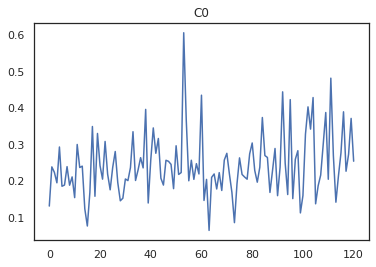

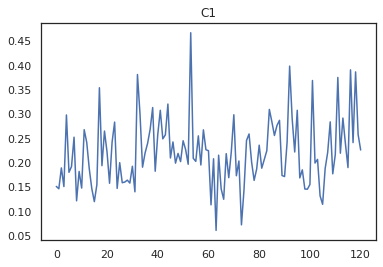

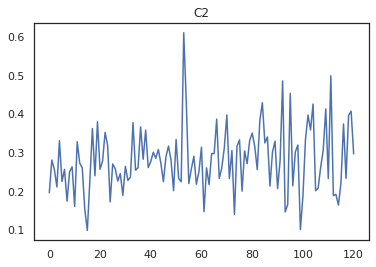

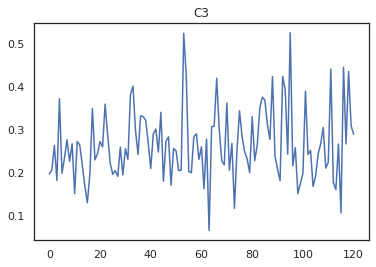

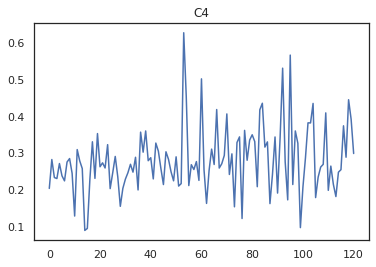

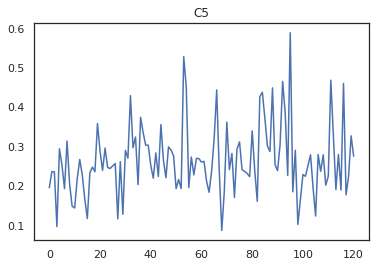

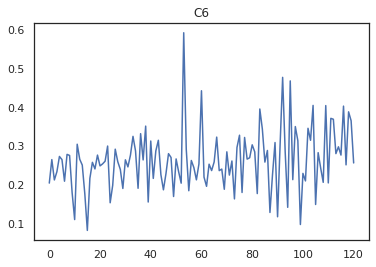

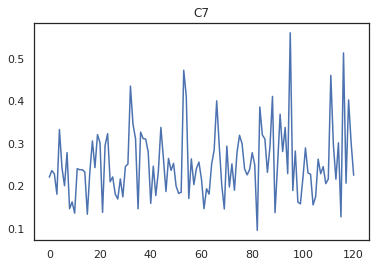

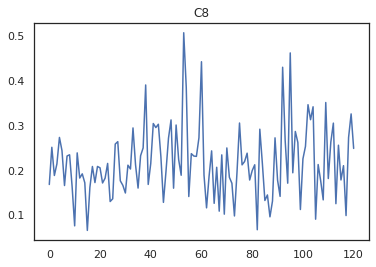

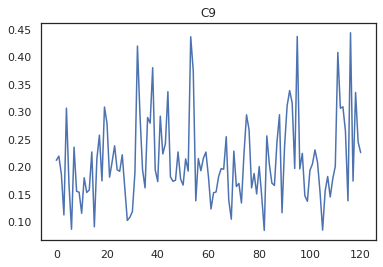

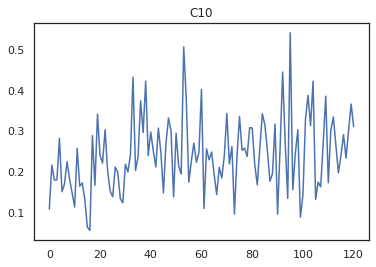

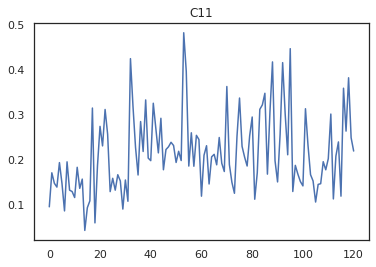

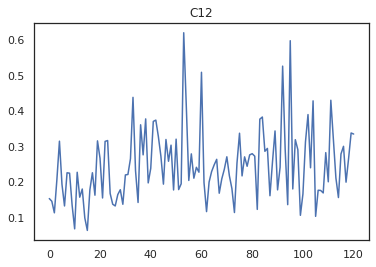

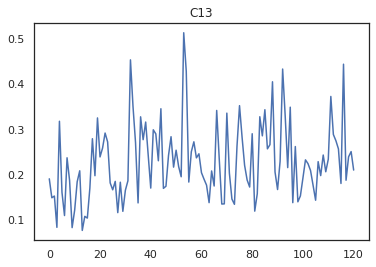

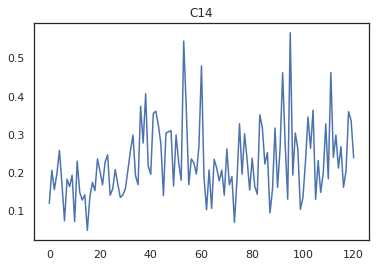

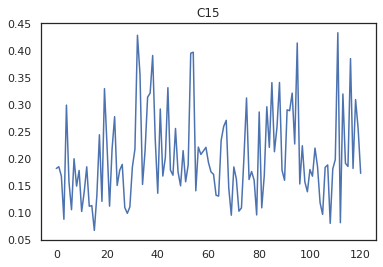

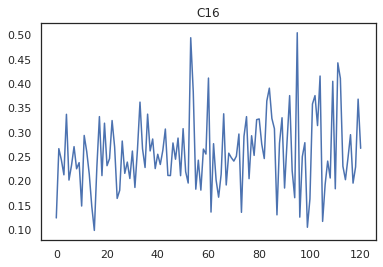

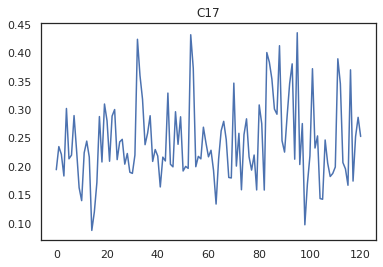

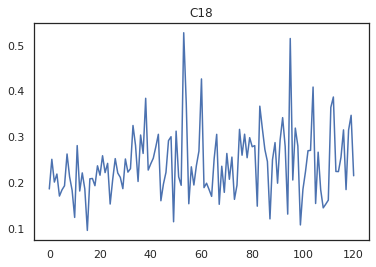

In [35]:
for col in data_x:
  plt.plot(data_x[col])
  plt.title(col)
  plt.show()

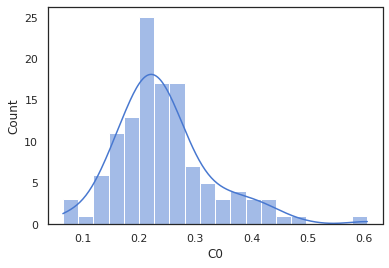

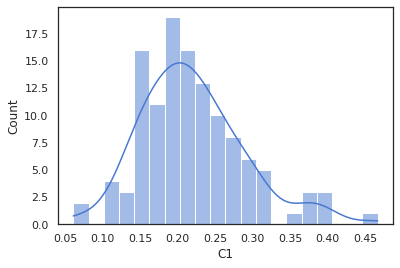

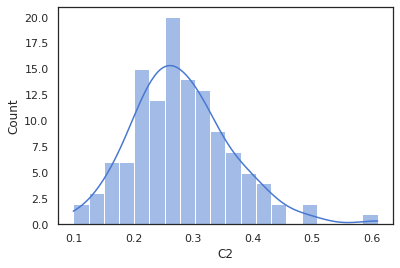

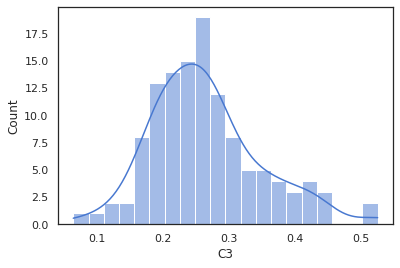

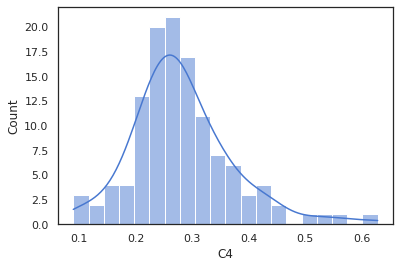

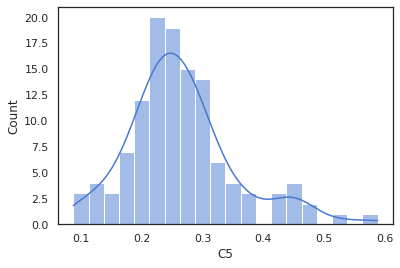

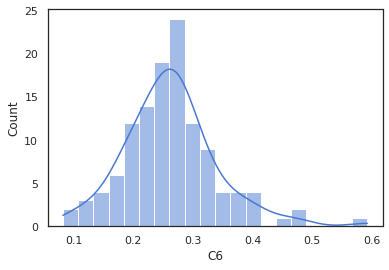

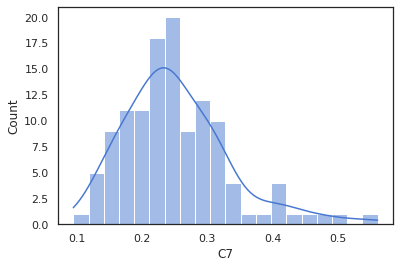

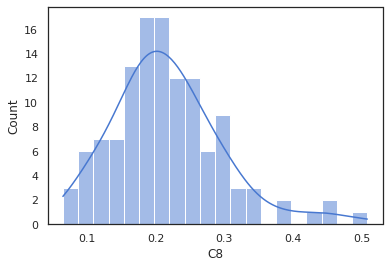

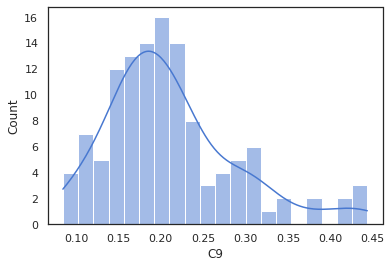

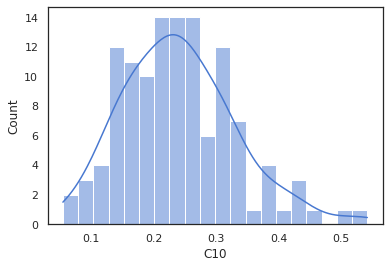

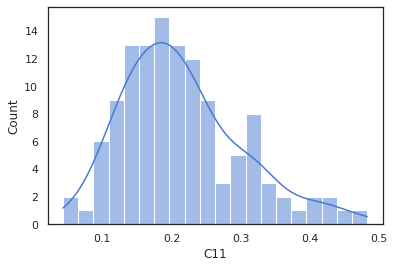

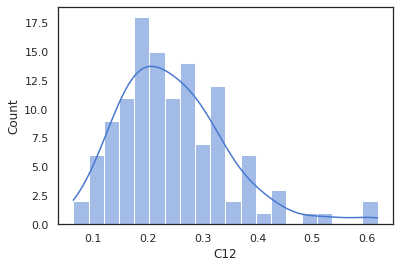

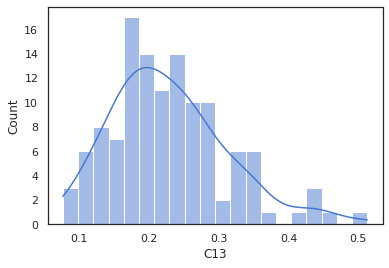

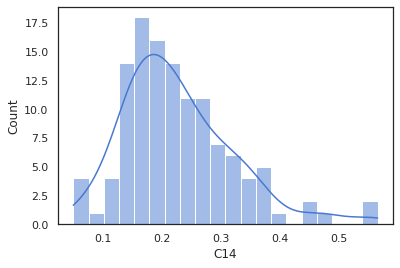

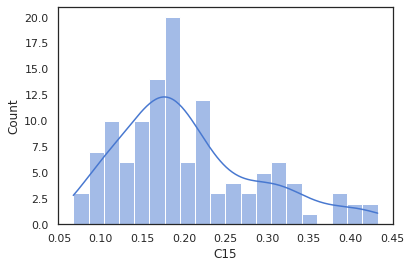

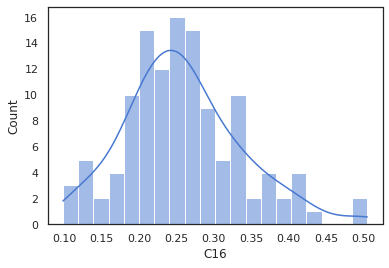

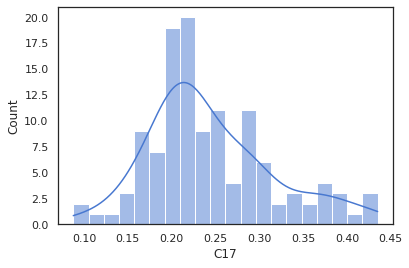

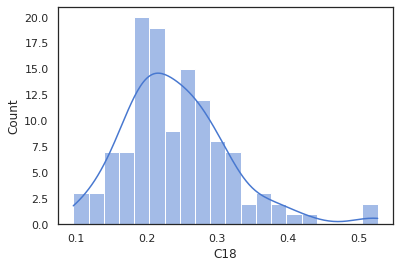

In [46]:
for col in data_x:
  sns.histplot(data_x[col],bins=20,kde=True,palette='muted')
  plt.show()

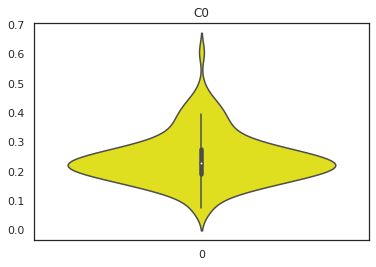

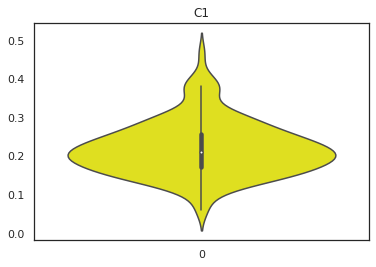

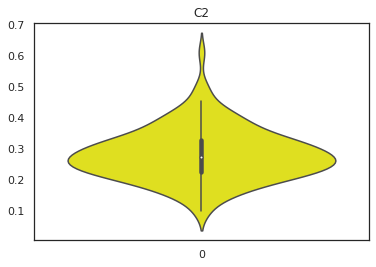

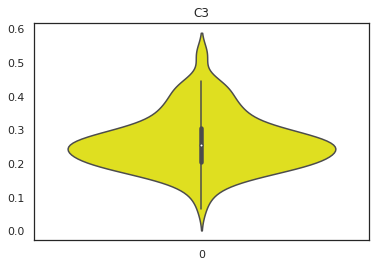

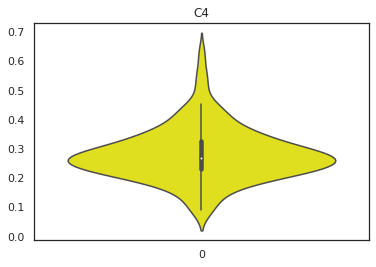

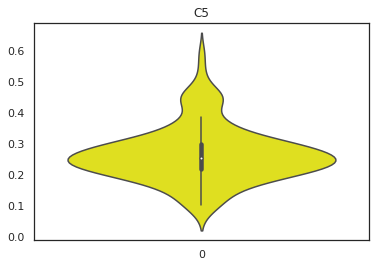

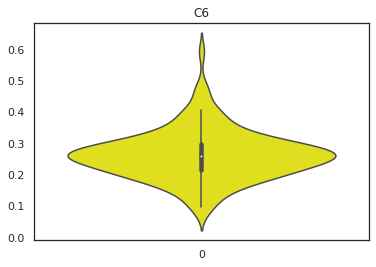

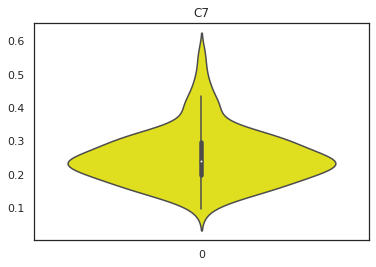

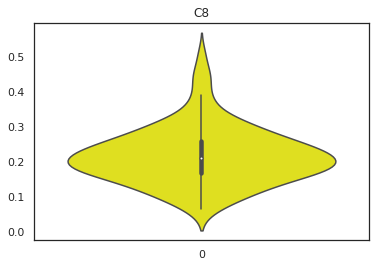

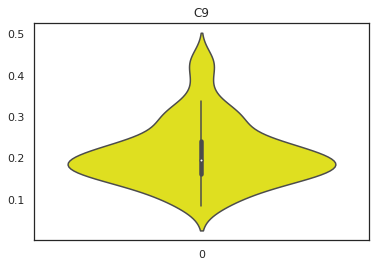

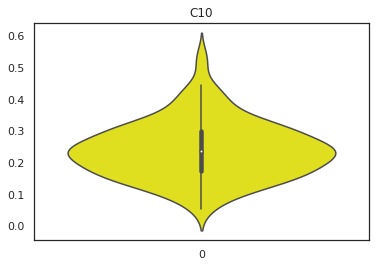

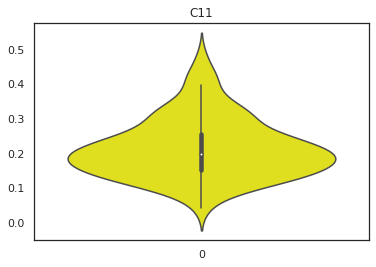

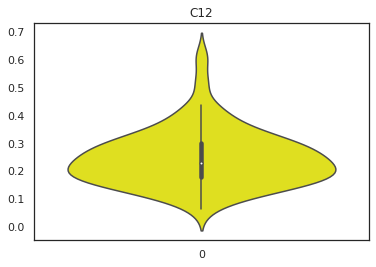

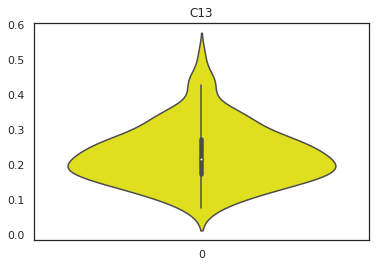

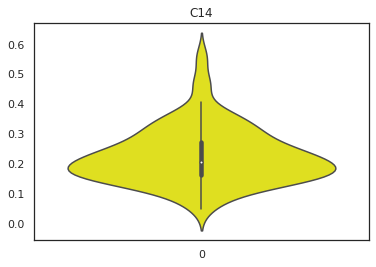

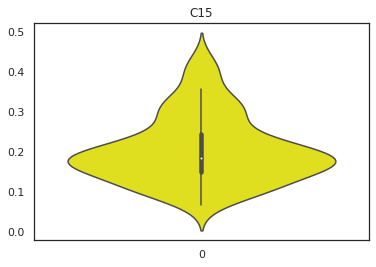

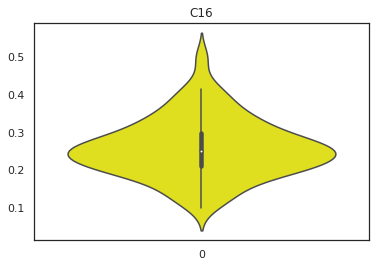

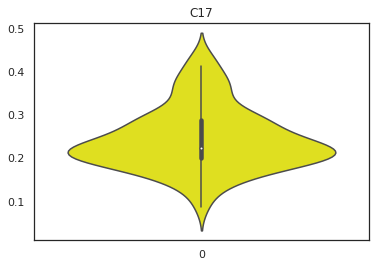

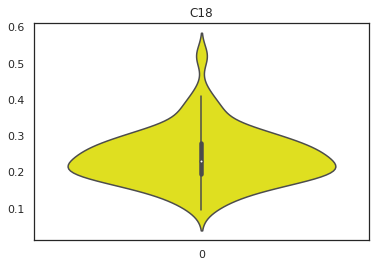

In [57]:
for col in data_x:
  sns.violinplot(data_x[col],color='yellow')
  plt.title(col)
  plt.show()

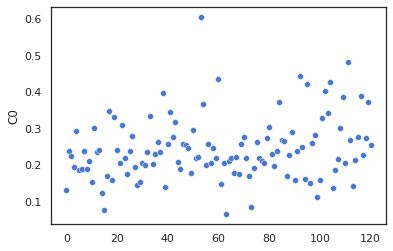

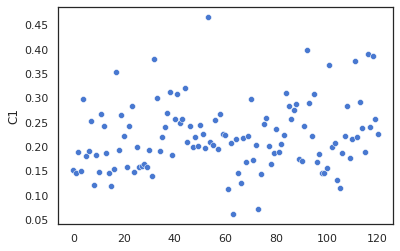

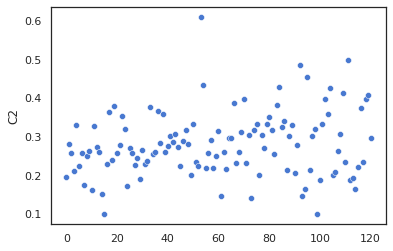

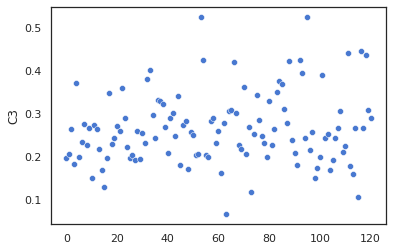

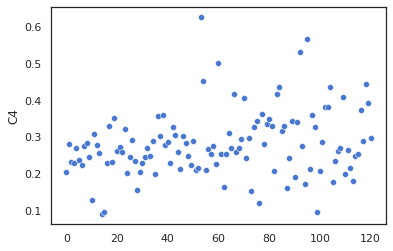

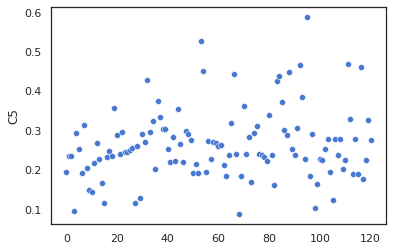

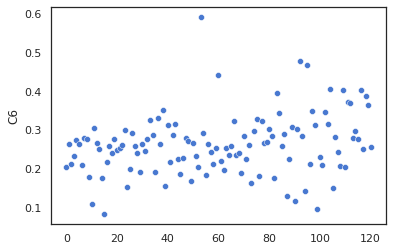

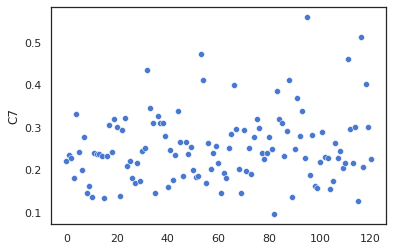

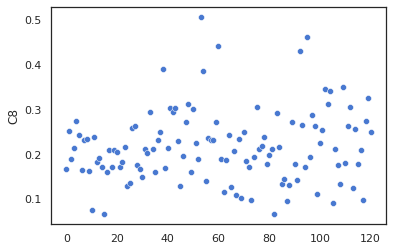

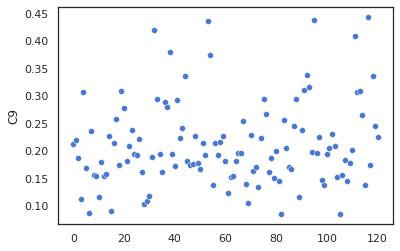

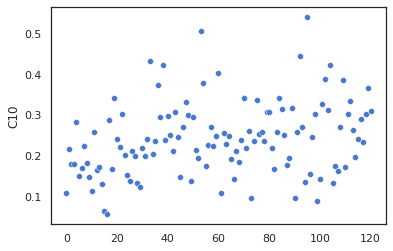

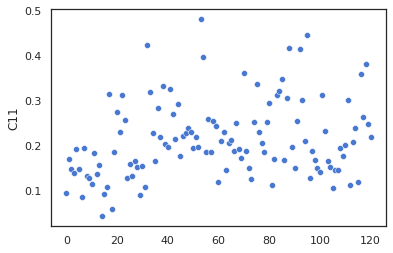

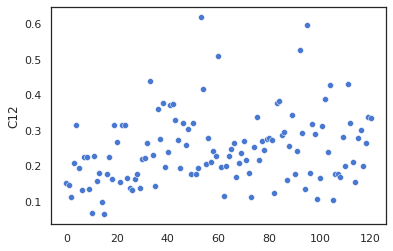

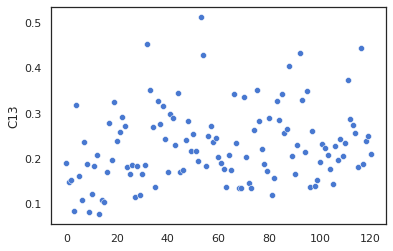

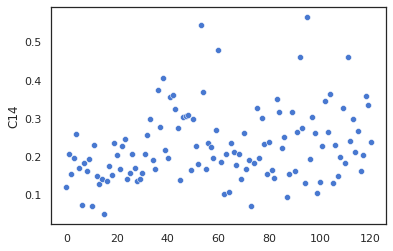

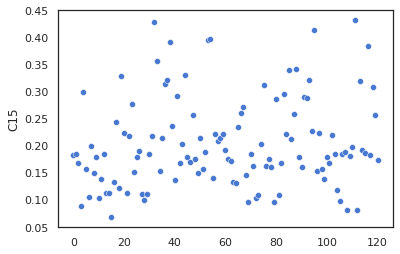

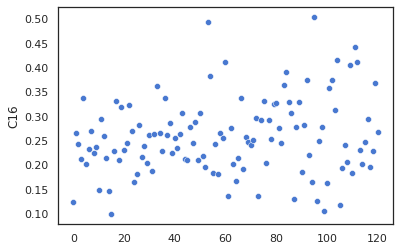

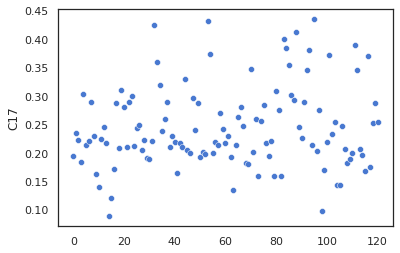

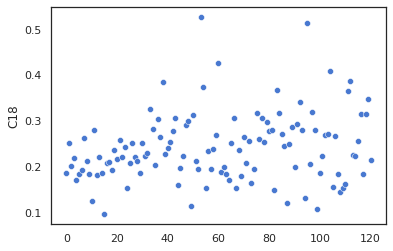

In [50]:
for col in data_x:
  sns.scatterplot(data_x[col])
  plt.show()

<Axes: >

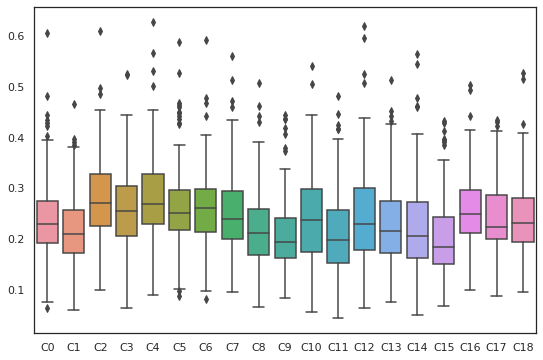

In [43]:
f, ax = plt.subplots(figsize=(9, 6))
sns.boxplot(data_x)

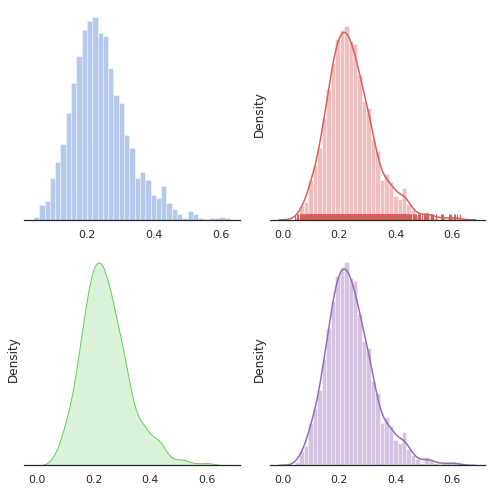

In [44]:
sns.set(style="white", palette="muted", color_codes=True)  
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 2, figsize=(7, 7),sharex=False)    
sns.despine(left=True)  
    
sns.distplot(data_x, kde=False, 
             color="b", ax=axes[0, 0])

sns.distplot(data_x,hist=True, rug=True,
             color="r", ax=axes[0, 1]) 

sns.distplot(data_x, hist=False, color="g", 
             kde_kws={"shade": True}, ax=axes[1, 0])

sns.distplot(data_x, color="m", ax=axes[1, 1])  

plt.setp(axes, yticks=[]) 
plt.tight_layout() 

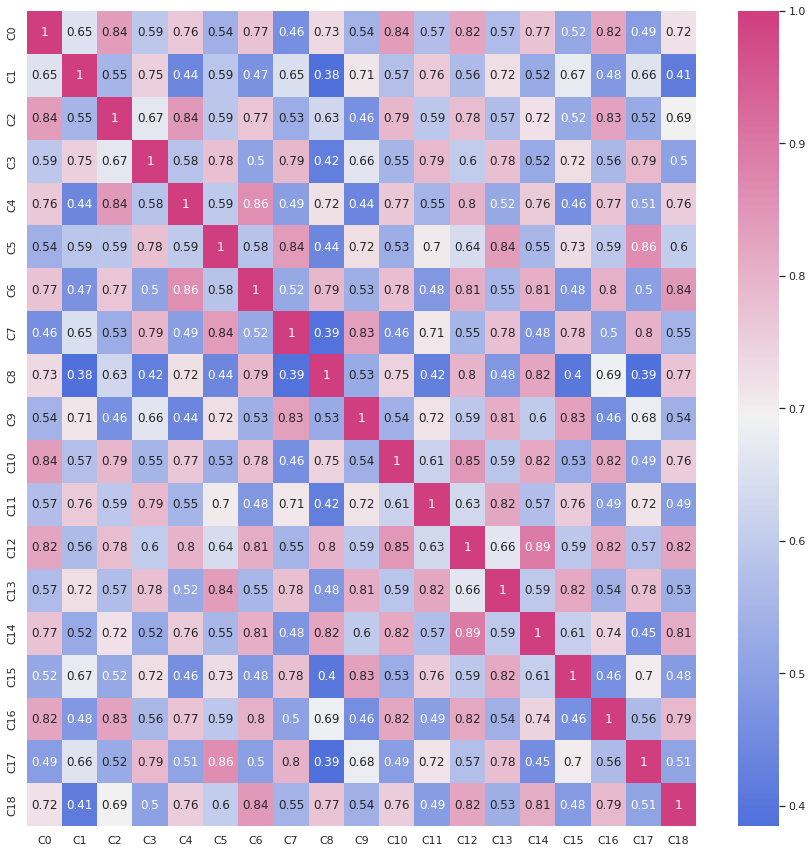

In [69]:
cmap = sns.diverging_palette(260,-10,as_cmap=True)
plt.subplots(figsize=(15,15))
sns.heatmap(data_x.corr(),cmap=cmap,annot=True)
plt.show()

**TEST DATASET**

In [14]:
test=pd.read_csv("/content/drive/MyDrive/dataset/test.csv")
test

,Unnamed: 0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
0,0,0.384610,0.309276,0.358952,0.353990,0.354311,0.343218,0.325433,0.278897,0.214064,0.196303,0.314639,0.313403,0.300720,0.273505,0.243730,0.221497,0.354516,0.292009,0.299070
1,1,0.293602,0.392750,0.360936,0.382049,0.334302,0.370057,0.301097,0.317234,0.277977,0.260862,0.339589,0.335280,0.302364,0.313071,0.281648,0.281033,0.347334,0.357033,0.288719
2,2,0.492858,0.337082,0.619303,0.393825,0.659735,0.342498,0.648507,0.359849,0.627332,0.333438,0.640649,0.364607,0.656703,0.392090,0.653200,0.347209,0.642687,0.323707,0.598655
3,3,0.447663,0.242898,0.518887,0.201946,0.551273,0.295801,0.468233,0.247192,0.411847,0.229515,0.551066,0.279197,0.575884,0.297715,0.496169,0.200299,0.497482,0.294769,0.422316
4,4,0.369962,0.416361,0.455355,0.481330,0.459105,0.478920,0.330062,0.413421,0.286061,0.350345,0.416600,0.474582,0.341713,0.455988,0.296936,0.305342,0.320776,0.438653,0.322280
5,5,0.402595,0.355883,0.502812,0.386641,0.515542,0.361846,0.466315,0.357740,0.415761,0.279231,0.401602,0.343257,0.410750,0.349266,0.390825,0.298350,0.483680,0.369104,0.454227
6,6,0.309627,0.308228,0.318253,0.311602,0.241035,0.258376,0.239015,0.262239,0.198051,0.238987,0.291734,0.275732,0.160888,0.235560,0.175690,0.206070,0.312770,0.245459,0.255219
7,7,0.334641,0.346832,0.359142,0.383540,0.359710,0.336434,0.283237,0.298320,0.308982,0.222387,0.313531,0.271528,0.298494,0.236543,0.154988,0.190960,0.232745,0.256529,0.203944
8,8,0.257352,0.260290,0.239610,0.237764,0.264784,0.265311,0.330536,0.275464,0.316082,0.261863,0.239582,0.234107,0.230988,0.222307,0.231232,0.246390,0.228876,0.247872,0.275458
9,9,0.273268,0.451927,0.289557,0.384620,0.309015,0.258925,0.417515,0.279825,0.281976,0.405417,0.377717,0.353825,0.331574,0.423970,0.379362,0.405464,0.381386,0.268537,0.284402


In [18]:
index=test.columns
index

Index(['Unnamed: 0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19'],
      dtype='object')

In [22]:
test.rename(columns={'Unnamed: 0': 'C0'}, inplace=True)

In [116]:
test['C0'] = test['C0'].replace([0,1,2,3,4,5,6,7], 1)
test['C0'] = test['C0'].replace([8,9,10,11,12,13,14,15], 0)

In [117]:
test.head(2)

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
0,1,0.384610,0.309276,0.358952,0.353990,0.354311,0.343218,0.325433,0.278897,0.214064,0.196303,0.314639,0.313403,0.300720,0.273505,0.243730,0.221497,0.354516,0.292009,0.299070
1,1,0.293602,0.392750,0.360936,0.382049,0.334302,0.370057,0.301097,0.317234,0.277977,0.260862,0.339589,0.335280,0.302364,0.313071,0.281648,0.281033,0.347334,0.357033,0.288719


In [118]:
test.tail(2)

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
14,1,0.340467,0.448040,0.425526,0.493649,0.474219,0.357667,0.409591,0.423554,0.289312,0.362446,0.366076,0.421299,0.327797,0.360296,0.388568,0.393917,0.26857,0.326056,0.337924
15,1,0.638366,0.436057,0.643229,0.481547,0.588465,0.501605,0.525797,0.455953,0.512525,0.456116,0.601256,0.461559,0.601601,0.458638,0.512349,0.440222,0.58972,0.421992,0.450333


In [119]:
test.isnull()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [120]:
test.isnull().sum()

C0     0
C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
C11    0
C12    0
C13    0
C14    0
C15    0
C16    0
C17    0
C18    0
C19    0
dtype: int64

In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C0      16 non-null     int64  
 1   C1      16 non-null     float64
 2   C2      16 non-null     float64
 3   C3      16 non-null     float64
 4   C4      16 non-null     float64
 5   C5      16 non-null     float64
 6   C6      16 non-null     float64
 7   C7      16 non-null     float64
 8   C8      16 non-null     float64
 9   C9      16 non-null     float64
 10  C10     16 non-null     float64
 11  C11     16 non-null     float64
 12  C12     16 non-null     float64
 13  C13     16 non-null     float64
 14  C14     16 non-null     float64
 15  C15     16 non-null     float64
 16  C16     16 non-null     float64
 17  C17     16 non-null     float64
 18  C18     16 non-null     float64
 19  C19     16 non-null     float64
dtypes: float64(19), int64(1)
memory usage: 2.6 KB


In [122]:
test.describe()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
count,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1.0,0.411846,0.347373,0.454120,0.370174,0.457466,0.358110,0.424070,0.320092,0.369304,0.294533,0.430363,0.337538,0.419196,0.338320,0.377953,0.286804,0.409941,0.317484,0.373569
std,0.0,0.133801,0.082333,0.141248,0.095067,0.149100,0.092083,0.127925,0.076523,0.133074,0.082890,0.137112,0.086677,0.168065,0.094220,0.151322,0.085664,0.144496,0.073253,0.123283
min,1.0,0.257352,0.180001,0.239610,0.201946,0.241035,0.224234,0.239015,0.186358,0.198051,0.174287,0.239582,0.191922,0.160888,0.186307,0.154988,0.182426,0.228876,0.207696,0.203944
25%,1.0,0.315780,0.300365,0.354700,0.312993,0.346365,0.288178,0.328905,0.272158,0.280976,0.229299,0.330636,0.274681,0.301953,0.264265,0.272168,0.204627,0.306767,0.254364,0.287640
50%,1.0,0.377286,0.344489,0.440441,0.384080,0.466662,0.343270,0.413553,0.307777,0.312532,0.270547,0.389659,0.335304,0.347043,0.341184,0.383965,0.289691,0.367951,0.309238,0.330102
75%,1.0,0.476656,0.421285,0.535852,0.431797,0.560571,0.392495,0.482624,0.371161,0.439653,0.353370,0.539677,0.378780,0.582313,0.400060,0.500214,0.348002,0.487131,0.375051,0.441551
max,1.0,0.734193,0.453422,0.731029,0.493649,0.727078,0.531744,0.656303,0.455953,0.627332,0.456116,0.703205,0.481957,0.726215,0.509440,0.653200,0.440222,0.702523,0.438653,0.643523


In [123]:
x_test=test.iloc[:,1:20]
x_test

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
0,0.384610,0.309276,0.358952,0.353990,0.354311,0.343218,0.325433,0.278897,0.214064,0.196303,0.314639,0.313403,0.300720,0.273505,0.243730,0.221497,0.354516,0.292009,0.299070
1,0.293602,0.392750,0.360936,0.382049,0.334302,0.370057,0.301097,0.317234,0.277977,0.260862,0.339589,0.335280,0.302364,0.313071,0.281648,0.281033,0.347334,0.357033,0.288719
2,0.492858,0.337082,0.619303,0.393825,0.659735,0.342498,0.648507,0.359849,0.627332,0.333438,0.640649,0.364607,0.656703,0.392090,0.653200,0.347209,0.642687,0.323707,0.598655
3,0.447663,0.242898,0.518887,0.201946,0.551273,0.295801,0.468233,0.247192,0.411847,0.229515,0.551066,0.279197,0.575884,0.297715,0.496169,0.200299,0.497482,0.294769,0.422316
4,0.369962,0.416361,0.455355,0.481330,0.459105,0.478920,0.330062,0.413421,0.286061,0.350345,0.416600,0.474582,0.341713,0.455988,0.296936,0.305342,0.320776,0.438653,0.322280
5,0.402595,0.355883,0.502812,0.386641,0.515542,0.361846,0.466315,0.357740,0.415761,0.279231,0.401602,0.343257,0.410750,0.349266,0.390825,0.298350,0.483680,0.369104,0.454227
6,0.309627,0.308228,0.318253,0.311602,0.241035,0.258376,0.239015,0.262239,0.198051,0.238987,0.291734,0.275732,0.160888,0.235560,0.175690,0.206070,0.312770,0.245459,0.255219
7,0.334641,0.346832,0.359142,0.383540,0.359710,0.336434,0.283237,0.298320,0.308982,0.222387,0.313531,0.271528,0.298494,0.236543,0.154988,0.190960,0.232745,0.256529,0.203944
8,0.257352,0.260290,0.239610,0.237764,0.264784,0.265311,0.330536,0.275464,0.316082,0.261863,0.239582,0.234107,0.230988,0.222307,0.231232,0.246390,0.228876,0.247872,0.275458
9,0.273268,0.451927,0.289557,0.384620,0.309015,0.258925,0.417515,0.279825,0.281976,0.405417,0.377717,0.353825,0.331574,0.423970,0.379362,0.405464,0.381386,0.268537,0.284402


In [124]:
test_y=test.iloc[:,0:1]
test_y.head(2)

,C0
0,1
1,1


**MODELLING**

**LIBRARIES FOR MODELLING**

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**SPLITTING DATA INTO TRAIN TEST**

**MODELLING**



In [126]:
KNN=KNeighborsClassifier()
NAIVE=GaussianNB()
LR = LogisticRegression()
RF = RandomForestClassifier()
Ensemble = VotingClassifier( estimators= [('KNN',KNN),('NB',NAIVE),('LR',LR),('RF',RF)], voting = 'hard')

**ENSEMBLE** **LEARNING**

In [127]:
Ensemble.fit(data_x,data_y)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('NB', GaussianNB()), ('LR', LogisticRegression()),
                             ('RF', RandomForestClassifier())])

In [128]:
datay_rand = (Ensemble.predict(data_x) > 0.5).astype(int)
print('Precision : ', np.round(precision_score(data_y,datay_rand)*100,2))
print('Accuracy : ', np.round(accuracy_score(data_y, datay_rand)*100,2))
print('Recall : ', np.round(recall_score(data_y, datay_rand)*100,2))
print('F1 score : ', np.round(f1_score(data_y, datay_rand)*100,2))
print('AUC : ', np.round(roc_auc_score(data_y, datay_rand)*100,2))

Precision :  82.46
Accuracy :  80.17
Recall :  77.05
F1 score :  79.66
AUC :  80.19


**K NEAREST NEIGHBOR**

In [129]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(data_x, data_y)
y_pred = knn.predict(x_test)
acc_knn=round(knn.score(data_x,data_y)*100,2)
print('Accuracy: ',acc_knn)
print('-------------------------------------------------------')
print(' ')
confuse=confusion_matrix(test_y,y_pred)
print('Confusion Matrix: ')
print(' ')
print(confuse)
print(' ')
print('-------------------------------------------------------')
print(classification_report(test_y,y_pred))

Accuracy:  79.34
-------------------------------------------------------
 
Confusion Matrix: 
 
[[ 0  0]
 [12  4]]
 
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.25      0.40        16

    accuracy                           0.25        16
   macro avg       0.50      0.12      0.20        16
weighted avg       1.00      0.25      0.40        16



**LOGISTIC REGRESSION**

In [130]:
logreg = LogisticRegression()
logreg.fit(data_x, data_y)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(data_x, data_y) * 100, 2)
print('Accuracy: ',acc_log)
print('-------------------------------------------------------')
print(' ')
confuse=confusion_matrix(test_y,y_pred)
print('Confusion Matrix: ')
print(' ')
print(confuse)
print(' ')
print('-------------------------------------------------------')
print(classification_report(test_y,y_pred))

Accuracy:  67.77
-------------------------------------------------------
 
Confusion Matrix: 
 
[[ 0  0]
 [16  0]]
 
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      16.0

    accuracy                           0.00      16.0
   macro avg       0.00      0.00      0.00      16.0
weighted avg       0.00      0.00      0.00      16.0



**RANDOM FOREST**

In [131]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(data_x, data_y)
datay_rand = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(data_x, data_y) * 100, 2)
print('Accuracy: ',acc_random_forest)
print('-------------------------------------------------------')
print(' ')
confuse=confusion_matrix(test_y,y_pred)
print('Confusion Matrix: ')
print(' ')
print(confuse)
print(' ')
print('-------------------------------------------------------')
print(classification_report(test_y,y_pred))

Accuracy:  100.0
-------------------------------------------------------
 
Confusion Matrix: 
 
[[ 0  0]
 [16  0]]
 
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      16.0

    accuracy                           0.00      16.0
   macro avg       0.00      0.00      0.00      16.0
weighted avg       0.00      0.00      0.00      16.0



In [132]:
gaussian = GaussianNB()
gaussian.fit(data_x, data_y)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(data_x, data_y) * 100, 2)
print('Accuracy: ',acc_gaussian)
print('-------------------------------------------------------')
print(' ')
confuse=confusion_matrix(test_y,y_pred)
print('Confusion Matrix: ')
print(' ')
print(confuse)
print(' ')
print('-------------------------------------------------------')
print(classification_report(test_y,y_pred))

Accuracy:  65.29
-------------------------------------------------------
 
Confusion Matrix: 
 
[[ 0  0]
 [15  1]]
 
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.06      0.12        16

    accuracy                           0.06        16
   macro avg       0.50      0.03      0.06        16
weighted avg       1.00      0.06      0.12        16



In [134]:
models = pd.DataFrame({'Model': ['Ensemble','KNN', 'Logistic Regression', 
                                 'Random Forest', 'Gaussian'],
                       'Score': [acc_enn, acc_knn, acc_log, acc_random_forest, acc_gaussian,]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,100.00
1,Ensemble,82.46
2,KNN,79.34
3,Logistic Regression,67.77
4,Gaussian,65.29


**RANDOM FOREST IS THE BEST MODEL**